# Support Vector Regression (SVR)

---

## Import the libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


---

## Import the dataset

In [62]:
dataset = pd.read_csv('0200-Data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [63]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [64]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [65]:
y = y.reshape(len(y), 1)

In [66]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]



---

## Feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc_x = StandardScaler()

In [69]:
X = sc_x.fit_transform(X)

In [70]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


We have to use different scalers for the differents columns we want to scale, because we don't want to use the same scale for both of them.

In [71]:
sc_y = StandardScaler()

In [72]:
y = sc_y.fit_transform(y)

In [73]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]



---

## Train the model

In [74]:
from sklearn.svm import SVR

Create SVR model with the Radial Basis Function Kernel.

In [75]:
regressor = SVR(kernel='rbf')

In [76]:
regressor.fit(X, y)

c:\Users\rgonzalez\Desktop\Python\machine-learning\machine-learning-venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()


---

## Predict a new result

We cannot use the predict function with a normal value of *6.5*, that's because we used scaled values to train or model, so we have to use the same scaler to the data we want to input to make a prediction.

In [77]:
y_pred = regressor.predict(sc_x.transform([[6.5]]))

After that, we will get a scaled result, not an actual result; so we have to transform the value to undo the scale.

In [78]:
sc_y.inverse_transform(y_pred.reshape(-1, 1))

array([[170370.0204065]])


---

## Visualize the results

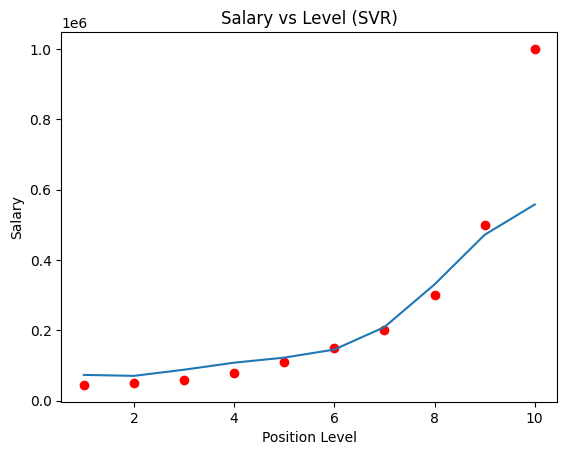

In [93]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)))

plt.title('Salary vs Level (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

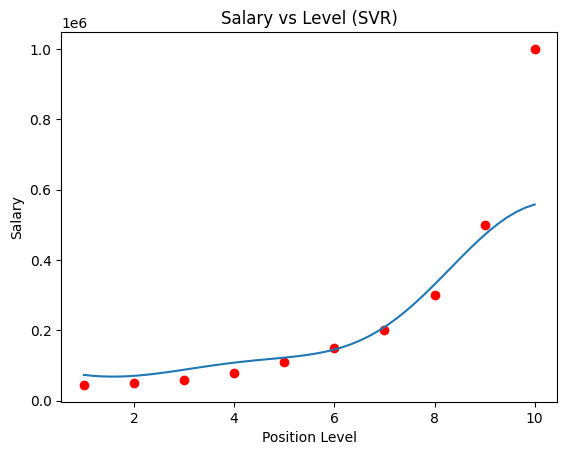

In [100]:
X_grid = np.linspace(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)))
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1, 1)))

plt.title('Salary vs Level (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()


---
